In [2]:
#Run the first three cells in this Notebook to read the polling data into a DataFrame named fires and to view some information about this DataFrame.
import sqlite3
import pandas as pd
fires_con = sqlite3.connect('FPA_FOD_20170508.sqlite')
fires_cur = fires_con.cursor()
fires_cur.execute('SELECT name FROM sqlite_master WHERE type="table"').fetchall()
fires_cur.execute('PRAGMA table_info(Fires)').fetchall()
fires = pd.read_sql_query("""SELECT fire_name, fire_size, state, latitude, longitude, fire_year, DATETIME(discovery_date) AS discovery_date, DATETIME(cont_date) AS contain_date FROM Fires""", fires_con)
fires.head(3)

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00


In [3]:
#Filter the data so it only contains fires for Alaska
fires = fires[fires["STATE"] == "AK"]
fires

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
4623,TONSINA CREEK,2.3,AK,60.053333,-149.440000,2005,2005-04-28 00:00:00,2005-04-29 00:00:00
4628,SHERIDAN GLACIER FIR,11.4,AK,60.506111,-145.343889,2005,2005-05-01 00:00:00,2005-05-02 00:00:00
4632,PETERSON CREEK,2.5,AK,60.885000,-149.045000,2005,2005-05-08 00:00:00,2005-05-10 00:00:00
4640,TWENTY MILE,0.1,AK,60.861667,-148.995000,2005,2005-05-09 00:00:00,2005-05-09 00:00:00
6489,TIRE,0.2,AK,56.509722,-132.871944,2005,2005-06-26 00:00:00,2005-06-27 00:00:00
...,...,...,...,...,...,...,...,...
1805263,THREE BEARS GAS,0.1,AK,63.334027,-142.963583,2015,2015-05-08 00:00:00,2015-05-08 00:00:00
1805264,HEMLOCK GROVE,0.1,AK,58.626250,-134.937388,2015,2015-06-30 00:00:00,None
1805265,BLACK ROCK,0.1,AK,58.602722,-134.919888,2015,2015-06-22 00:00:00,None
1856890,KOKWOK RIVER,1825.0,AK,59.607750,-158.254194,2015,2015-06-20 00:00:00,2015-08-12 00:00:00


In [4]:
#Add the days_burning column by calculating the number of days between the discovery_date and the contain_date.
fires.discovery_date = pd.to_datetime(fires.discovery_date)
fires.contain_date = pd.to_datetime(fires.contain_date)
fires["days_burning"] = (fires.contain_date - fires.discovery_date).dt.days
fires

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date,days_burning
4623,TONSINA CREEK,2.3,AK,60.053333,-149.440000,2005,2005-04-28,2005-04-29,1.0
4628,SHERIDAN GLACIER FIR,11.4,AK,60.506111,-145.343889,2005,2005-05-01,2005-05-02,1.0
4632,PETERSON CREEK,2.5,AK,60.885000,-149.045000,2005,2005-05-08,2005-05-10,2.0
4640,TWENTY MILE,0.1,AK,60.861667,-148.995000,2005,2005-05-09,2005-05-09,0.0
6489,TIRE,0.2,AK,56.509722,-132.871944,2005,2005-06-26,2005-06-27,1.0
...,...,...,...,...,...,...,...,...,...
1805263,THREE BEARS GAS,0.1,AK,63.334027,-142.963583,2015,2015-05-08,2015-05-08,0.0
1805264,HEMLOCK GROVE,0.1,AK,58.626250,-134.937388,2015,2015-06-30,NaT,NaN
1805265,BLACK ROCK,0.1,AK,58.602722,-134.919888,2015,2015-06-22,NaT,NaN
1856890,KOKWOK RIVER,1825.0,AK,59.607750,-158.254194,2015,2015-06-20,2015-08-12,53.0


In [5]:
#Filter the data so it only contains fires that burned for at least 90 days and at least 100 acres.
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12843 entries, 4623 to 1856891
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FIRE_NAME       8927 non-null   object        
 1   FIRE_SIZE       12843 non-null  float64       
 2   STATE           12843 non-null  object        
 3   LATITUDE        12843 non-null  float64       
 4   LONGITUDE       12843 non-null  float64       
 5   FIRE_YEAR       12843 non-null  int64         
 6   discovery_date  12843 non-null  datetime64[ns]
 7   contain_date    8697 non-null   datetime64[ns]
 8   days_burning    8697 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 1003.4+ KB


In [6]:
fires_mod = fires.query('FIRE_SIZE >= 100'and'days_burning >= 90')[['FIRE_NAME','FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR', 'discovery_date','contain_date', 'days_burning']]
fires_mod

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date,days_burning
210509,MHM SE 36,10.0,AK,63.682800,-151.085600,1993,1993-06-03,1993-09-03,92.0
210516,332248,36250.0,AK,65.799500,-149.719200,1993,1993-06-04,1993-09-03,91.0
210546,3322292,47494.0,AK,66.116400,-142.869200,1993,1993-06-06,1993-09-08,94.0
210831,404275,43329.7,AK,62.782700,-155.419000,1994,1994-06-13,1994-09-22,101.0
210855,412312,22420.0,AK,63.832900,-145.285600,1994,1994-06-14,1994-10-04,112.0
...,...,...,...,...,...,...,...,...,...
1804904,15579 TOTSON,4223.7,AK,64.473167,-157.292028,2015,2015-06-22,2015-09-28,98.0
1804999,HICKEY CREEK,33131.0,AK,62.624555,-157.597750,2015,2015-06-20,2015-09-21,93.0
1805011,BUFFALO MINE,0.1,AK,61.733527,-149.029083,2015,2015-04-20,2015-09-28,161.0
1805072,ROCK CREEK,9178.0,AK,61.186833,-154.635666,2015,2015-06-23,2015-09-21,90.0


In [7]:
#Use the describe() method to search for outliers in the days_burning column
#search the Internet to find out how to use the percentiles parameter to add the 90th and 95th percentiles to the output.(The values for the 95th percentile)
fires_mod.describe(percentiles=[0.25, 0.75, 0.9, 0.95])

,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date,days_burning
count,252.000000,252.000000,252.000000,252.000000,252,252,252.000000
mean,60806.938849,64.770144,-149.338475,2007.761905,2008-03-20 09:37:08.571428608,2008-07-13 08:22:51.428571392,114.948413
min,0.100000,60.205650,-161.002400,1993.000000,1993-06-03 00:00:00,1993-09-03 00:00:00,90.000000
25%,4189.925000,63.950125,-153.455018,2004.000000,2004-06-20 06:00:00,2004-10-19 00:00:00,97.750000
50%,22627.850000,64.769800,-149.409337,2008.000000,2008-07-06 12:00:00,2008-10-14 12:00:00,104.000000
75%,66628.000000,65.799916,-144.355675,2014.000000,2014-04-30 06:00:00,2014-10-08 00:00:00,115.000000
90%,166233.440000,66.523630,-142.292390,2015.000000,2015-06-21 21:36:00,2015-09-29 00:00:00,132.000000
95%,270473.090000,67.000400,-141.559195,2015.000000,2015-06-23 00:00:00,2015-09-29 00:00:00,145.450000
max,537627.000000,69.336700,-141.008400,2015.000000,2015-07-05 00:00:00,2015-10-07 00:00:00,1101.000000
std,93976.596055,1.496864,5.182648,5.851317,NaN,NaN,69.591246


In [8]:
#Filter the data so it doesn’t contain any fires have outliers in the days_burning column
#Display the first five rows
fires_mod2 = fires.query('days_burning <= 145')[['FIRE_NAME','FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR', 'discovery_date','contain_date', 'days_burning']]
fires_mod2.head(5)

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date,days_burning
4623,TONSINA CREEK,2.3,AK,60.053333,-149.440000,2005,2005-04-28,2005-04-29,1.0
4628,SHERIDAN GLACIER FIR,11.4,AK,60.506111,-145.343889,2005,2005-05-01,2005-05-02,1.0
4632,PETERSON CREEK,2.5,AK,60.885000,-149.045000,2005,2005-05-08,2005-05-10,2.0
4640,TWENTY MILE,0.1,AK,60.861667,-148.995000,2005,2005-05-09,2005-05-09,0.0
6489,TIRE,0.2,AK,56.509722,-132.871944,2005,2005-06-26,2005-06-27,1.0


In [9]:
fires_mod2.describe()

,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date,days_burning
count,8684.000000,8684.000000,8684.000000,8684.000000,8684,8684,8684.000000
mean,3486.122897,63.100686,-149.279362,2003.997467,2004-06-21 03:01:34.518654976,2004-07-01 19:47:27.167204096,10.698526
min,0.010000,52.930000,-168.870000,1992.000000,1992-04-04 00:00:00,1992-04-04 00:00:00,0.000000
25%,0.100000,61.450000,-152.156600,1995.000000,1995-05-30 18:00:00,1995-06-03 00:00:00,0.000000
50%,0.500000,63.520500,-149.350006,2005.000000,2005-07-28 12:00:00,2005-09-26 00:00:00,1.000000
75%,20.000000,64.911013,-145.999575,2011.000000,2011-05-30 06:00:00,2011-06-07 00:00:00,8.000000
max,606945.000000,70.330600,-130.050833,2015.000000,2015-12-03 00:00:00,2015-12-03 00:00:00,145.000000
std,23276.164830,2.709753,6.408536,8.048539,NaN,NaN,22.820756


<Axes: xlabel='days_burning', ylabel='FIRE_SIZE'>

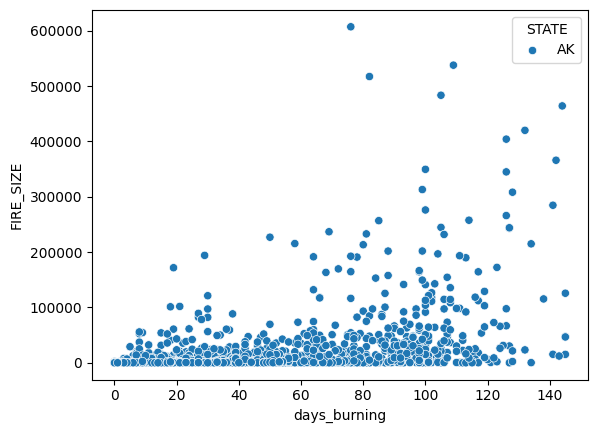

In [10]:
#Create a scatterplot that compares the number of acres burned to the number of days burning
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=fires_mod2, x='days_burning', y='FIRE_SIZE', hue='STATE')

Text(0, 0.5, 'Number of Acres Burned (FIRE_SIZE)')

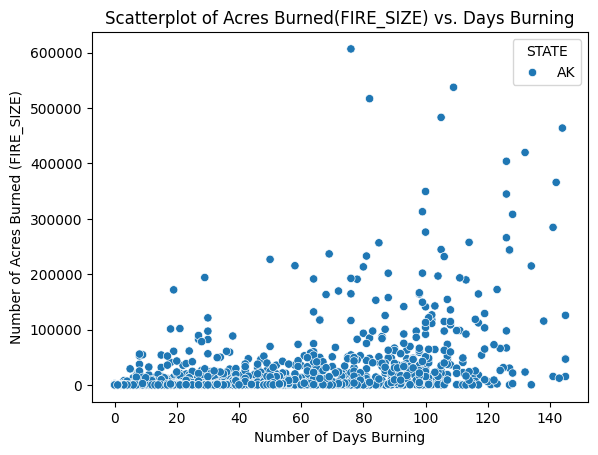

In [11]:
#Enhance the scatterplot from the previous step by adding a title for the plot and labels for the x and y axes.
sns.scatterplot(data=fires_mod2, x='days_burning', y='FIRE_SIZE', hue='STATE')
plt.title('Scatterplot of Acres Burned(FIRE_SIZE) vs. Days Burning')
plt.xlabel('Number of Days Burning')
plt.ylabel('Number of Acres Burned (FIRE_SIZE)')

In [12]:
#Use GeoPandas to read the shapes of the maps for the United States into a GeoDataFrame from this file
#Filter the data in the GeoDataFrame so it only contains the shape for Alaska
import geopandas as geo
import matplotlib.pyplot as plt
fires_AK_2015 = fires.query('FIRE_YEAR == 2015 & STATE == "AK"')

fire_locations = geo.GeoDataFrame(fires_AK_2015,geometry=geo.points_from_xy(fires_AK_2015.LONGITUDE,fires_AK_2015.LATITUDE))
file_path = "Maps"
usa = geo.read_file(file_path)
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.0738 22.00418, -160.04971..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.4808 44.69..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<Axes: >

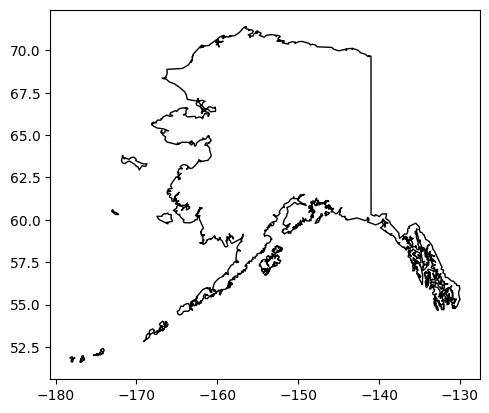

In [13]:
#Use the plot() method of the GeoDataFrame to display an outline for the state of Alaska.
ak_map = usa[usa.STATE_NAME	 == 'Alaska']
ak_map.plot(color='white', edgecolor='black')

<Axes: >

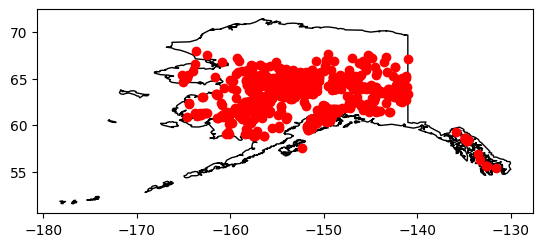

In [14]:
#Use the Seaborn scatterplot() method to display a scatterplot of all of the fires on top of the outline for the state of Alaska
fire_locations.plot(color='red',ax=ak_map.plot(color='white', edgecolor='black'))

<Axes: >

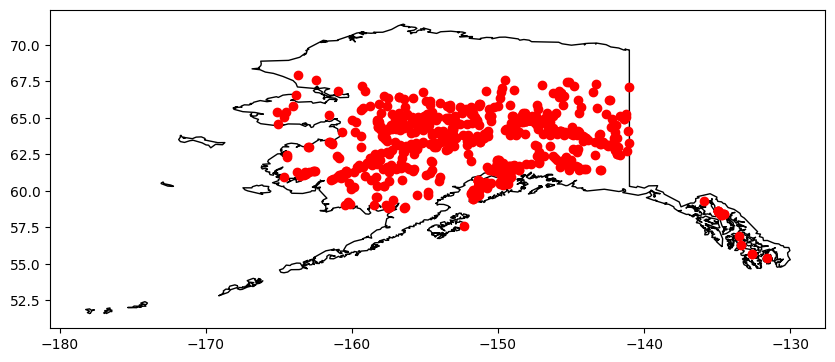

In [15]:
#Increase the size of the plot by using the figsize parameter of the plot() method that displays the outline of Alaska.
# Adjust figsize as desired
ax = ak_map.plot(color='white', edgecolor='black', figsize=(10, 10))  
fire_locations.plot(color='red', ax=ax)

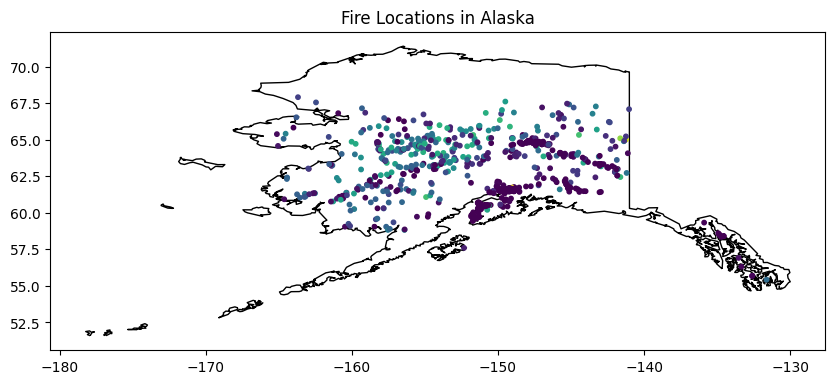

In [16]:
#Modify the scatterplot to change the dot color based on the number of days the fire has been burning
colormap = plt.cm.viridis
ax = ak_map.plot(color='white', edgecolor='black', figsize=(10, 10))
fire_locations.plot(ax=ax,column='days_burning',  cmap=colormap, markersize=10)

plt.title('Fire Locations in Alaska')
plt.show()

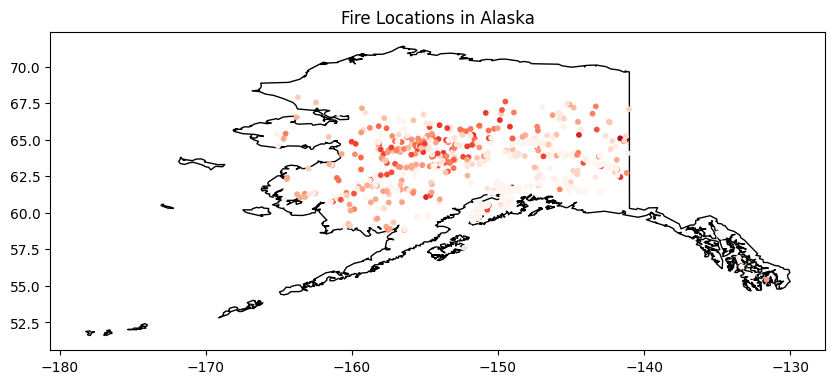

In [17]:
#Modify the colors of the dots to use a redish color for the dots with a darker red for fires that have been burning for a higher number of days
colormap = plt.cm.Reds
ax = ak_map.plot(color='white', edgecolor='black', figsize=(10, 10))
fire_locations.plot(ax=ax,column='days_burning',  cmap=colormap, markersize=10)

plt.title('Fire Locations in Alaska')
plt.show()

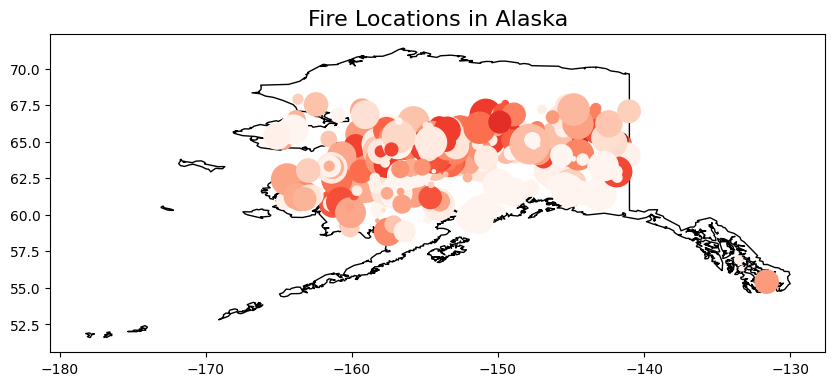

In [18]:
#Modify the size of the dots with bigger dots for fires that have been burning for a higher number of days
colormap = plt.cm.Reds
scale_factor = 5  
ax = ak_map.plot(color='white', edgecolor='black', figsize=(10, 10))  
fire_locations.plot(ax=ax,column='days_burning', cmap=colormap,markersize=fire_locations['days_burning'] * scale_factor)

plt.title('Fire Locations in Alaska', fontsize=16)
plt.show()